In [220]:
import numpy as np
from math import pi as Pi
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random
import pandas as pd

In [221]:
#1
import numpy as np

# RELU Function
ReLU = np.vectorize(lambda z: np.fmax(0,z))

#softmax Function
softmax = lambda z: np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

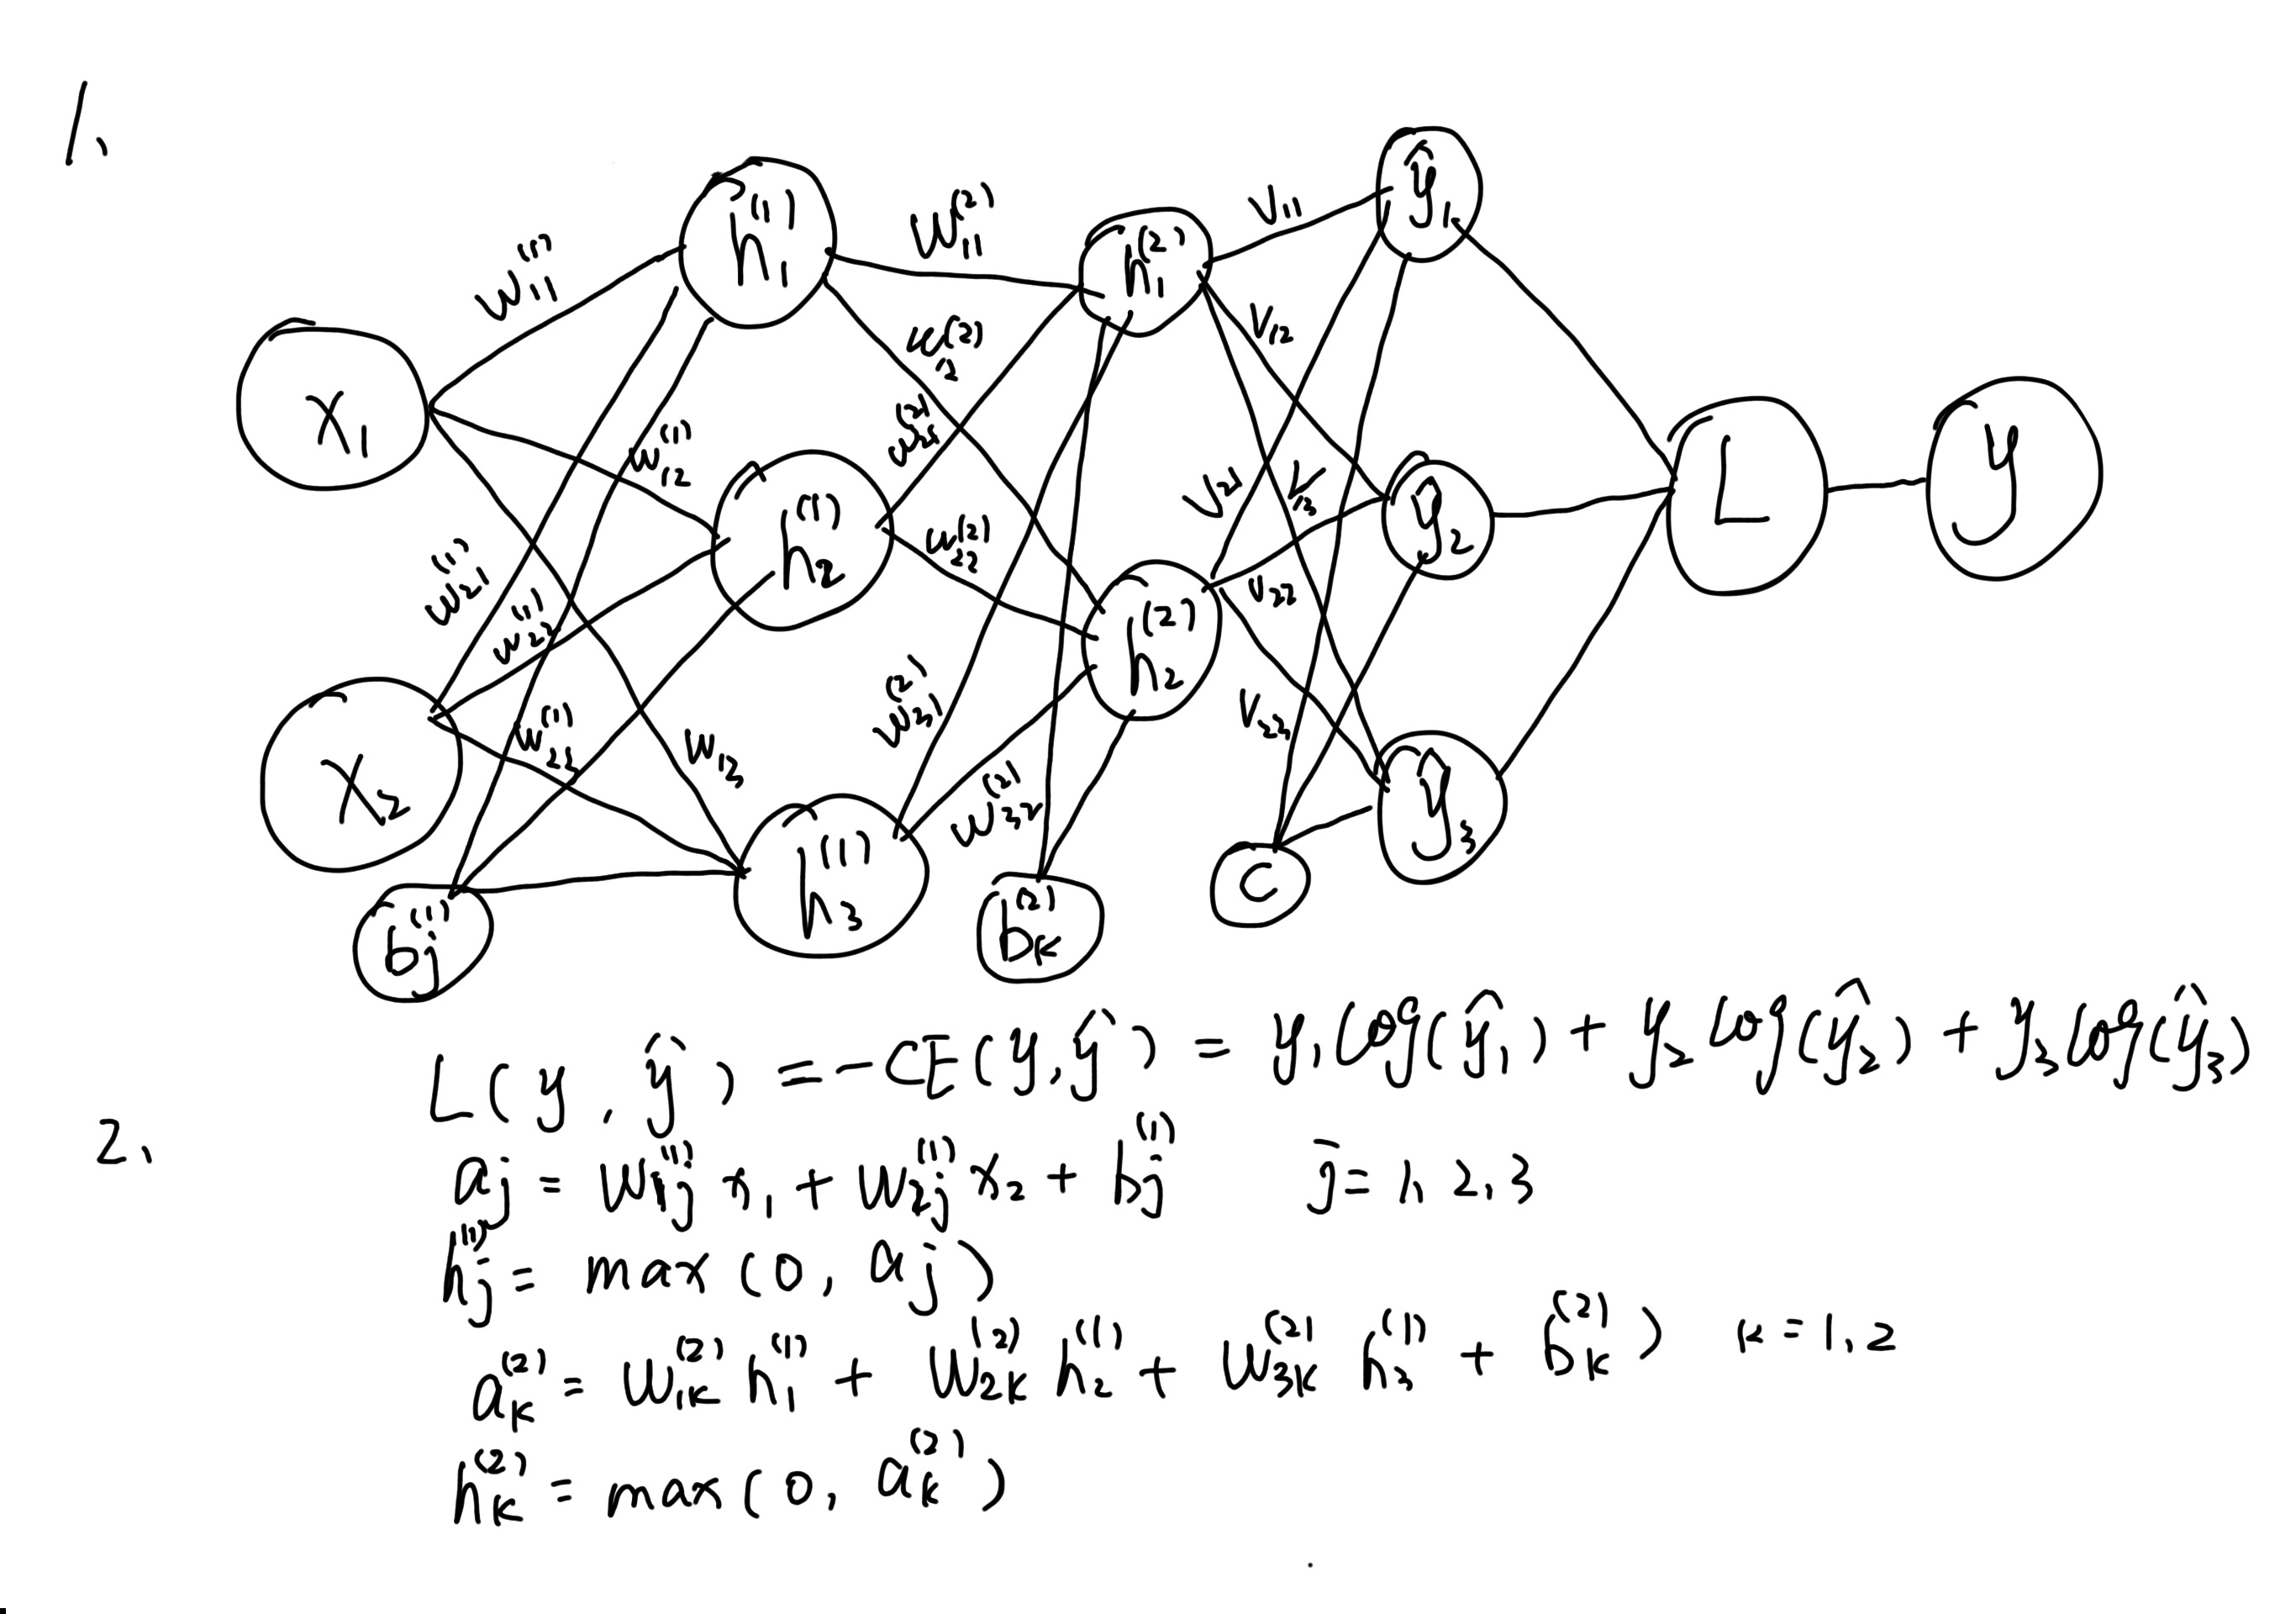

In [222]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename ="1_1.jpg")

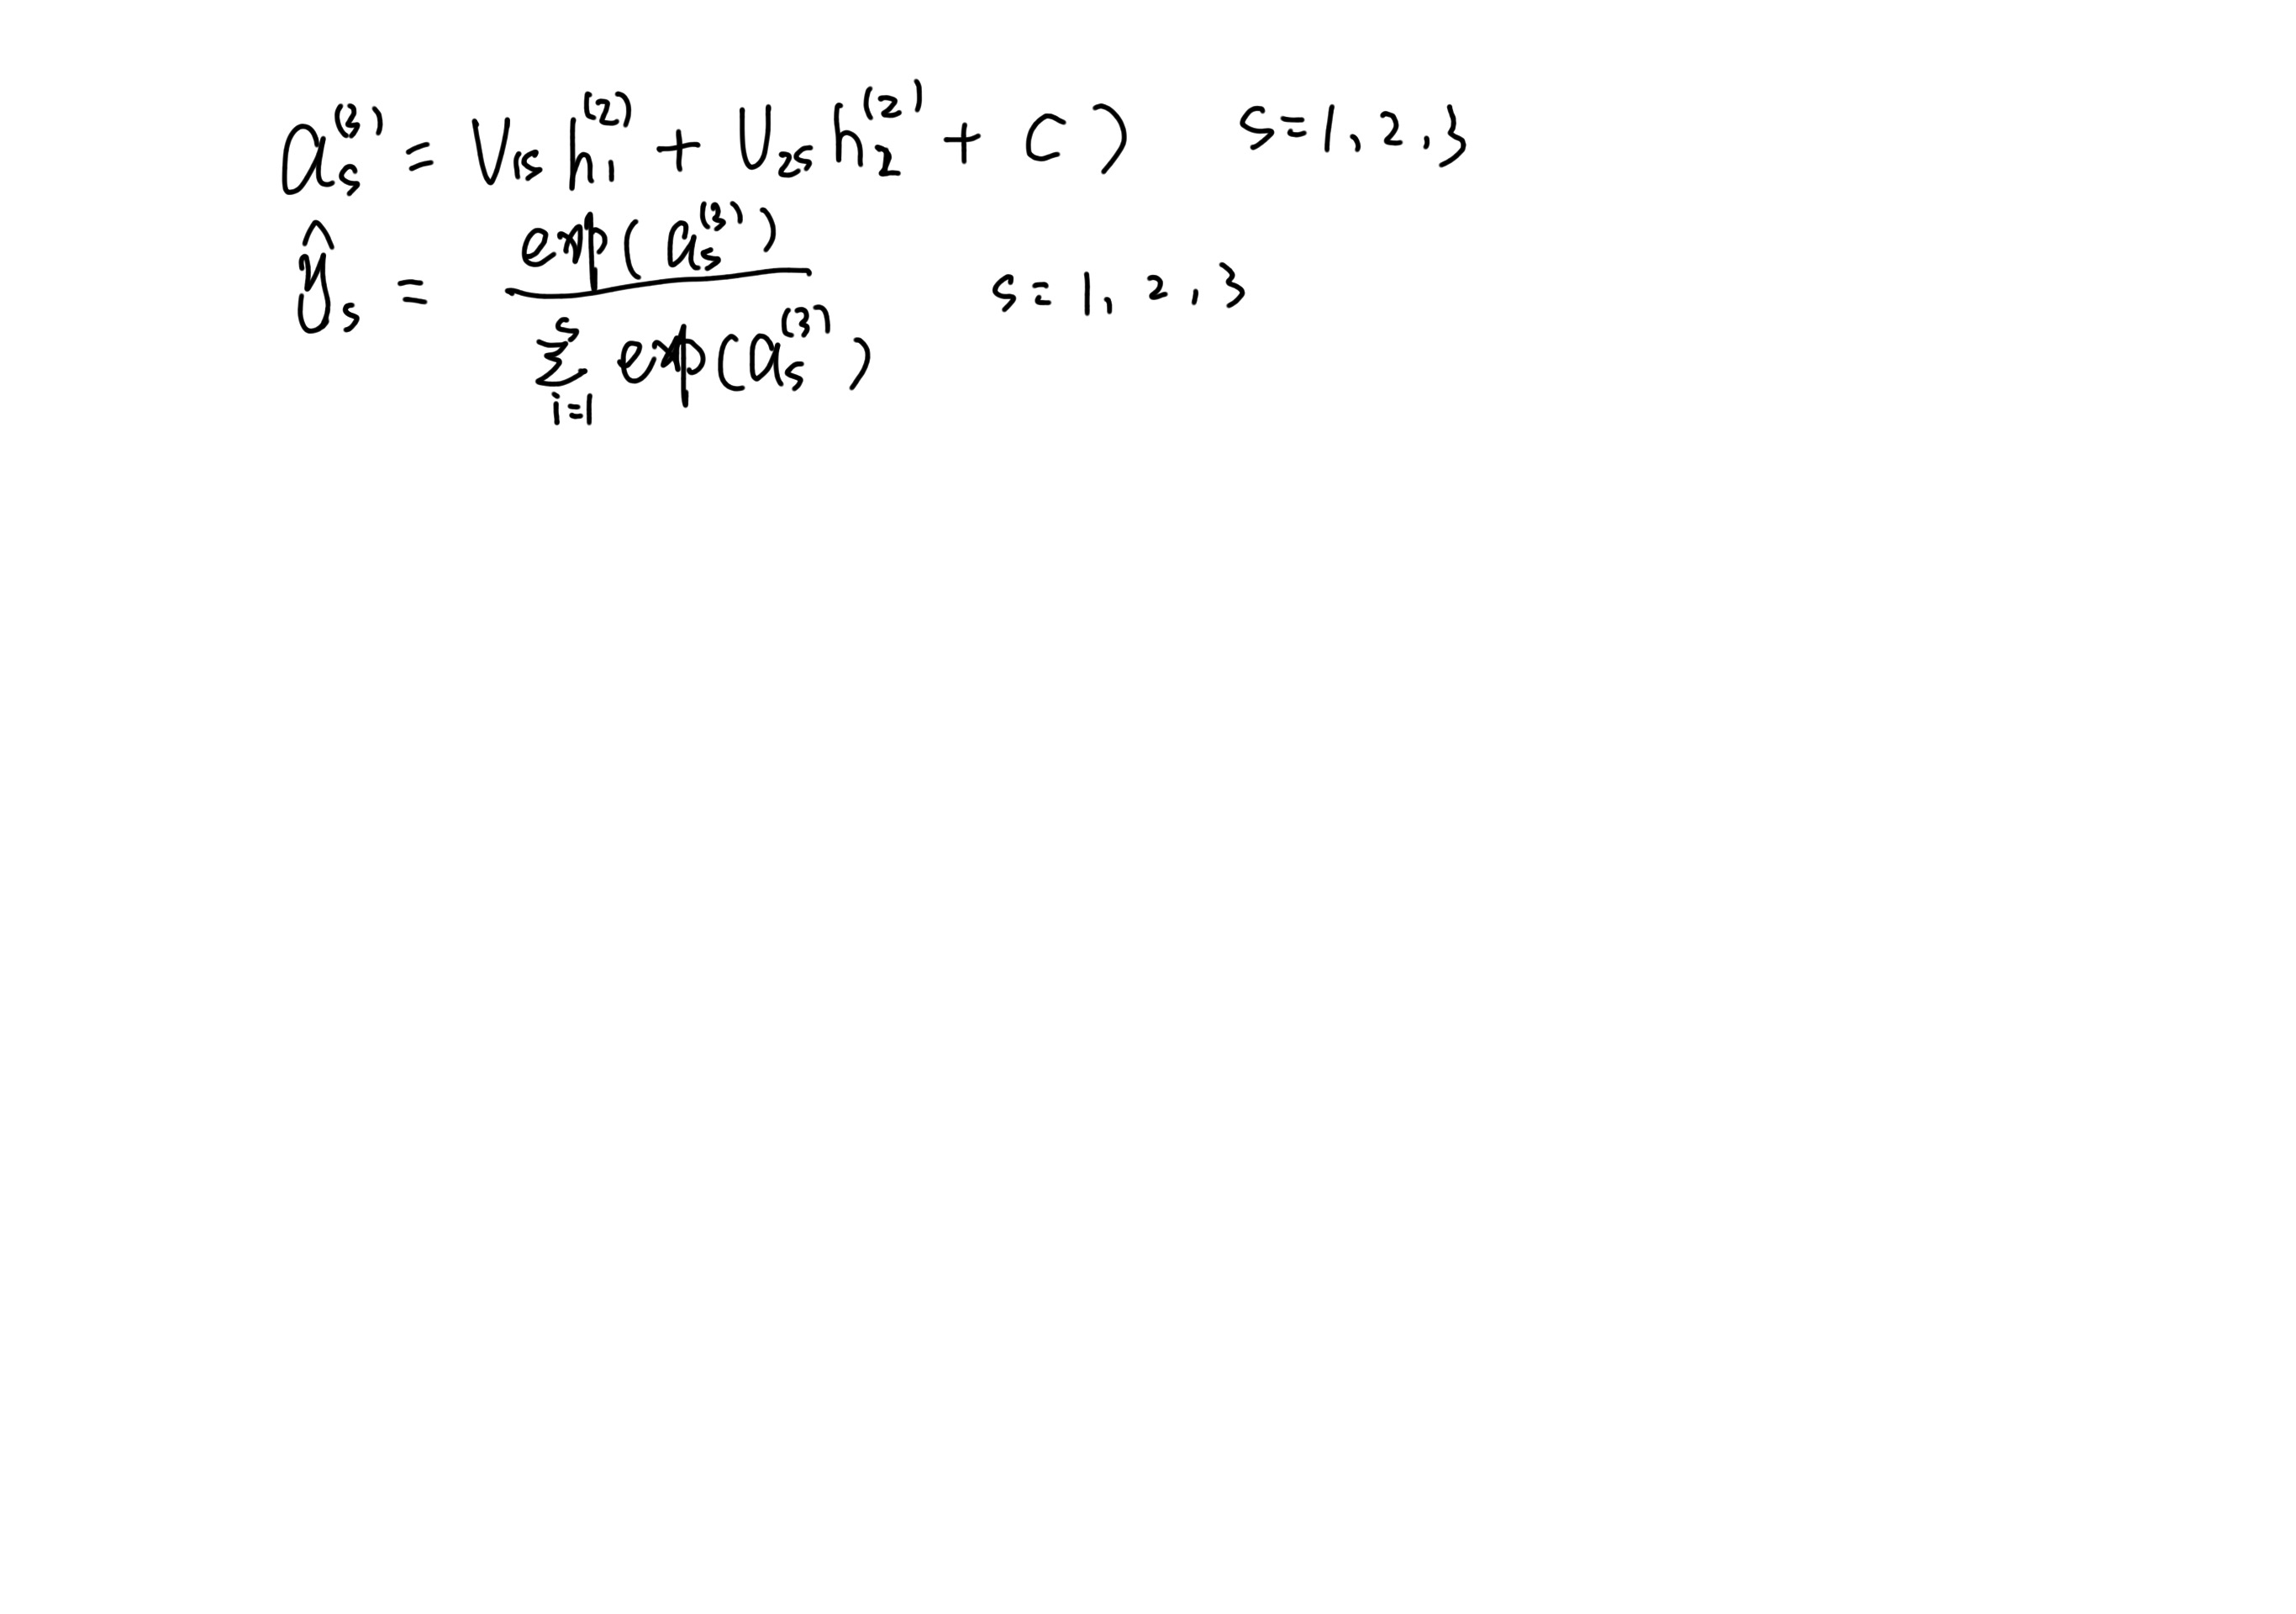

In [223]:
Image(filename ="1_2.png")

In [224]:
###########3.
def ff_nn_2_ReLu(x, w1, b_1, w2, b_2, v, c):
    
    # Setting up our output y
    num_rows,num_columns = x.shape
    y = np.zeros((3,3))
    
    
    for i in range(num_rows):
        x_i = x[i,:]
        
        # Linear activations into hidden units
        #a1 = x_i[0]*w[0,0] + x_i[1]*w[1,0] + b_1[0]
        #a2 = x_i[0]*w[0,1] + x_i[1]*w[1,1] + b_1[1]
        #a3 = x_i[0]*w[0,2] + x_i[1]*w[1,2] + b_1[2]
        
        a1 = x.dot(w1)+b_1
        
        # output of hidden units
        #h_1 = ReLU(a1)
        #h_2 = ReLU(a2)
        #h_3 = ReLU(a3)
        #h = np.array([h_1,h_2,h_3])
        h = ReLU(a1)
        
        # Linear activations into hidden units
        #a2_1 = h[0]*w2[0,0] + h[1]*w2[1,0] + h[2]*w2[2,0] + b_2[0]
        #a2_2 = h[0]*w2[0,1] + h[1]*w2[1,1] + h[2]*w2[2,1] + b_2[1]
        
        a2 = h.dot(w2)+b_2
        
        # output of hidden units
        #h2_1 = ReLU(a2_1)
        #h2_2 = ReLU(a2_1)
        #h2 = np.array([h2_1,h2_2])
        h2 = ReLU(a2)
        
        # Output of network
        #a3_1 = h2[0]*v[0,0] + h2[1]*v[1,0] + c[0]
        #a3_2 = h2[0]*v[0,1] + h2[1]*v[1,1] + c[1]
        #a3_3 = h2[0]*v[0,2] + h2[1]*v[1,2] + c[2]
        #a3 = np.array([a3_1, a3_2, a3_3])
        
        a3 = h2.dot(v)+c
        
        y = softmax(a3)
        #k[i] = y
    
    return y, h, h2

In [225]:
x = np.array([[1,0,0],[-1,-1,1]]).transpose()
w1 = np.array([[1,0],[-1,0],[0,0.5]]).transpose()
w2 = np.array([[1,0,0],[-1,-1,0]]).transpose()
v = np.array([[1,1],[0,0],[-1,-1]]).transpose()
b_1 = np.array([0,0,1])
b_2 = np.array([1,-1])
c = np.array([1,0,0])
ff_nn_2_ReLu(x, w1, b_1, w2, b_2, v, c)[0]

array([[ 0.94649912,  0.04712342,  0.00637746],
       [ 0.84379473,  0.1141952 ,  0.04201007],
       [ 0.84379473,  0.1141952 ,  0.04201007]])

In [226]:
#2
def rosenbrock(x,y):
      return (1-x)**2 + 100* ((y-x**2))**2

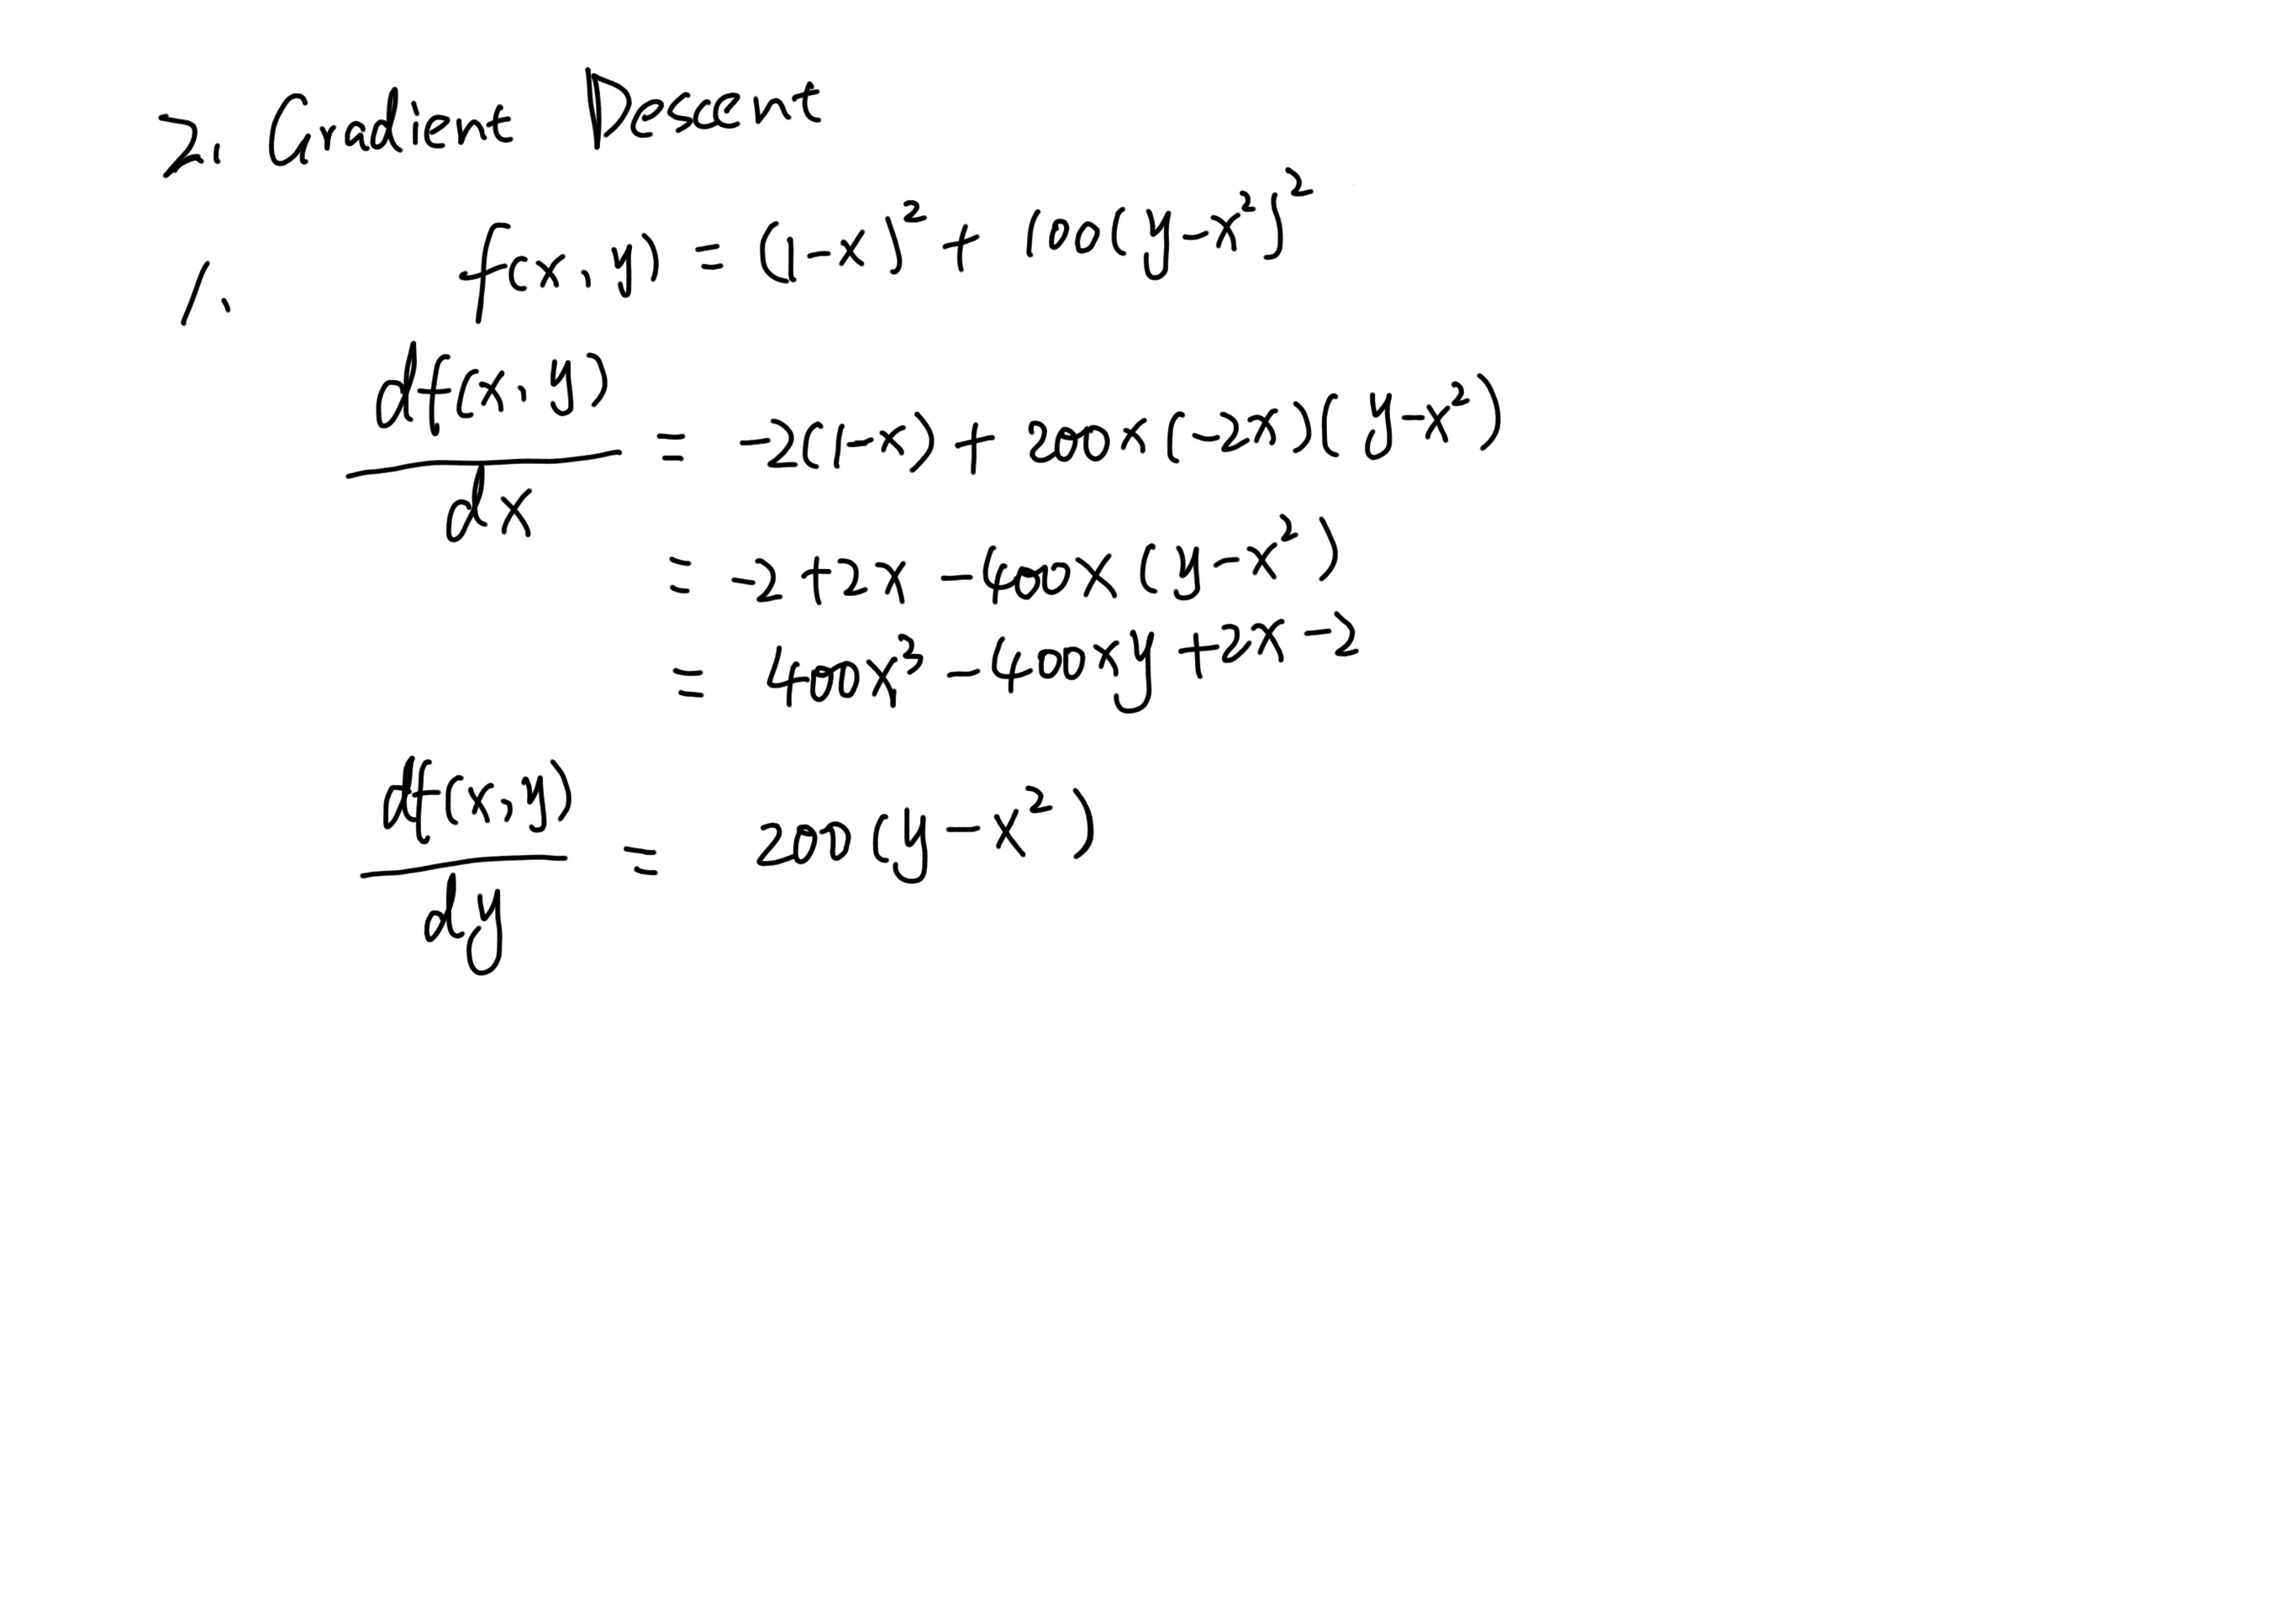

In [227]:
Image(filename ="2_1.jpg")

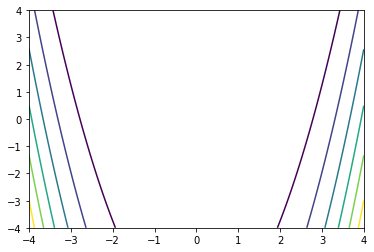

In [228]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

delta = 0.0025
x = np.arange(-4.0, 4.0, delta)
y = np.arange(-4.0, 4.0, delta)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

In [229]:
# --- Defining gradient ----
def grad_f(vector):
    x, y = vector
    df_dx = 400*x**3-400*x*y+2*x-2 
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

In [230]:
# --- Grad Descent ----
def grad_descent(starting_point=None, iterations=10, learning_rate=0.0025):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

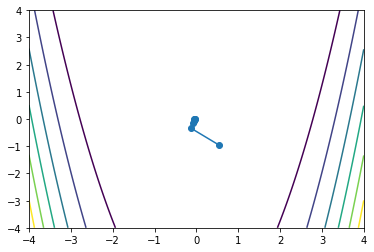

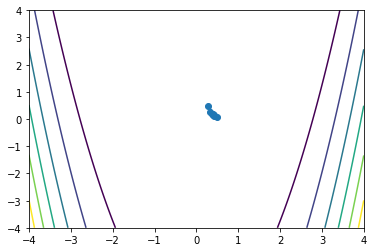

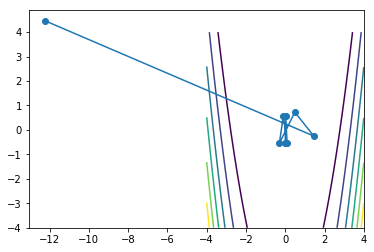

In [231]:
# --- Visualize Trajectory ---
np.random.seed(10)
traj = grad_descent(iterations=7)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

##############2
traj = grad_descent(iterations=7,learning_rate=0.005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#############3
traj = grad_descent(iterations=7,learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


In [232]:
# --- Gradient with momentum ---
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


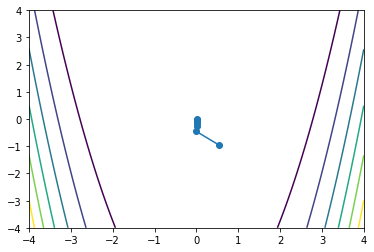

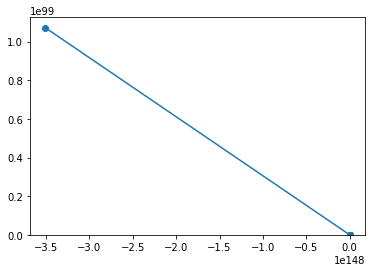

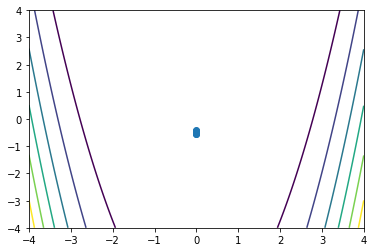

In [233]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=8, epsilon=.002, alpha=.0025)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


#############2
traj = grad_descent_with_momentum(iterations=8, epsilon=.02, alpha=.0025)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#############3
traj = grad_descent_with_momentum(iterations=8, epsilon=.0001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [234]:
#3
def Relu_derivative(x):
    return np.where(x > 0, 1, 0)

    return - tot.sum()
def loss(y, y_hat):
    #n = y.shape[0]
    return -np.sum(y * np.log(y_hat))

def y_hat(x,w1,b1,w2,b2,v,c):
    return ff_nn_2_ReLu(x,w1,b1,w2,b2,v,c)[0]

In [235]:

def grad_f(vector, x, y, h1, h2, y_hat):
    w1,b1,w2,b2,v,c = vector
    y_hat = ff_nn_2_ReLu(x, w1,b1,w2,b2,v,c)[0]

    
    dv = np.dot(h2.T,(y_hat-y))
    dc = np.array([(y_hat - y).sum(axis=0)])
    dev_1 = np.dot((y_hat-y),v.T)*(h2>0)
    dw2 = np.dot(h1.T, dev_1)
    db2 = np.array([dev_1.sum(axis=0)])
    dev_2 = np.dot(dev_1, w2.T) * (h1>0)
    dw1 = np.dot(x.T, dev_2)
    db1 = np.array([dev_2.sum(axis=0)])
    
    #return np.array([dv, dc,dw2,db2,dw1,db1])
    return np.array([dw1,db1,dw2,db2,dv,dc])

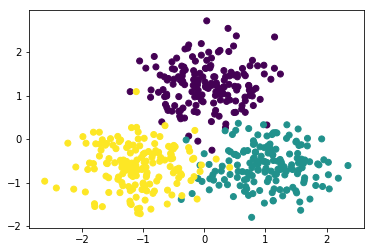

In [244]:
def gen_gmm_data(n = 300, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)

    # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl

x,y,cl = gen_gmm_data(500)
plt.scatter(x[:,0], x[:,1], c=cl[0])
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#  Generate data for network    #
#################################
x, y, cl = gen_gmm_data(120)
np.random.seed(666)
w1 = np.random.randn(6).reshape(2,3)
b1 = np.array([0,0,0])
w2 = np.random.randn(6).reshape(3,2)
b2 = np.array([0,0])
v = np.random.randn(6).reshape(2,3)
c = np.array([0,0,0])

In [237]:
def combine_vector(w1,b1,w2,b2,v,c):
    vector = np.array([w1,b1,w2,b2,v,c])
    return vector
def break_vector(vector):
    w1,b1,w2,b2,v,c = vector 
    return w1,b1,w2,b2,v,c 

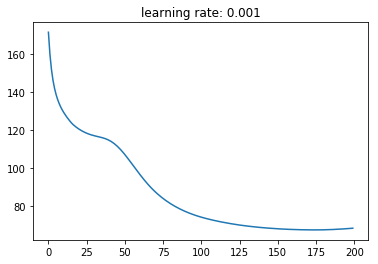

In [255]:
def grad_descent_b(x, y, w1,b1,w2,b2,v,c,iterations=10, learning_rate=0.01):
    point = np.array([w1,b1,w2,b2,v,c])
    #trajectory = [point]
    iters = []
    #losses = [loss(y, ff_nn_2_ReLu(x, w1,b1,w2,b2,v,c)[0])]
    losses = []
    y_hat = ff_nn_2_ReLu(x, w1,b1,w2,b2,v,c)[0]
    h1 = ff_nn_2_ReLu(x, w1,b1,w2,b2,v,c)[1]
    h2 = ff_nn_2_ReLu(x, w1,b1,w2,b2,v,c)[2]
    
    for i in range(iterations):
        grad = grad_f(point,x,y, h1, h2, y_hat)
        point = point - learning_rate * grad
        w1,b1,w2,b2,v,c = point
        #trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x, w1,b1,w2,b2,v,c)[0]))
        iters.append(i)
    return losses, iters
    #return point

losses, iters = grad_descent_b(x,y,w1,b1,w2,b2,v,c, iterations=200, learning_rate=0.001)
#print(losses)
plt.plot(iters,losses)
plt.title('learning rate: 0.001')
plt.show()

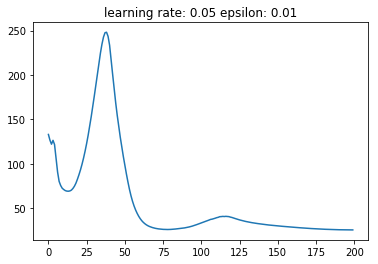

In [254]:
def grad_descent_with_momentum_b(x, y, w1,b1,w2,b2,v,c, iterations=10, alpha=.9, epsilon=0.1):
    point = np.array([w1,b1,w2,b2,v,c])
    iters = []
    sp = np.array([np.zeros(w1.shape), np.zeros(b1.shape), np.zeros(w2.shape), np.zeros(b2.shape), np.zeros(v.shape), np.zeros(c.size)])
    #losses = [loss(y, ff_nn_2_ReLu(x, w1,b1,w2,b2,v,c)[0])]
    losses = []
    y_hat = ff_nn_2_ReLu(x, w1,b1,w2,b2,v,c)[0]
    h1 = ff_nn_2_ReLu(x, w1,b1,w2,b2,v,c)[1]
    h2 = ff_nn_2_ReLu(x, w1,b1,w2,b2,v,c)[2]
    
    for i in range(iterations):
        grad = grad_f(point,x,y, h1, h2, y_hat)
        sp     = alpha*sp + epsilon*grad
        point = point - sp
        w1,b1,w2,b2,v,c = point
        #trajectory.append(point)
        iters.append(i)
        losses.append(loss(y, ff_nn_2_ReLu(x, w1,b1,w2,b2,v,c)[0]))
    
    return losses, iters

losses, iters = grad_descent_with_momentum_b(x,y,w1,b1,w2,b2,v,c, iterations=200, alpha=.05, epsilon=0.01)
#print(losses)
#plt.plot(losses,'-o')
plt.plot(iters,losses)
plt.title('learning rate: 0.05 epsilon: 0.01')
plt.show()

According to the losses graph we get from gradient descent and momentum, we can see that when iters around 75, the momentum algorithm is converaged but the iters around 150, the gradient descent algorithm is converaged. So, we can conclude that the momentum algorithm is more efficient.